# Credit Card Clustering
#### ( this is done using K-means unsupervised  algorithm)

### Importing the Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [4]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\DataSets\archive\CC GENERAL.csv")

# Sample of the Data
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Basic Information about the Dataset

In [5]:
# Number of rows and columns of the dataset
data.shape

(8950, 18)

In [6]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Basic Description of the Dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
# There are nummvaluers in the Dataset
# Checking for null Values
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
# Since it is the minimum payments. let us use the interpolate methods to fill in the null values by using the previous value.
data = data.interpolate(method='pad')

In [17]:
# Now let us check the null values
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Feature Selection

In [25]:
''' By seeing the dataset, we can segment the credit card customers by theri Balance, Purchaes and their Credit card Limit.
This is enough to perform the clustering on the credit card holders based on the Balance, Purchases and their Limit '''
 # Hence we segment the customers based on these criteria
    
new_df = data.iloc[:,[1,3,-5]] # Balance, Purchases, Credid Card Limit
new_df.head()

,BALANCE,PURCHASES,CREDIT_LIMIT
0,40.900749,95.40,1000.0
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
3,1666.670542,1499.00,7500.0
4,817.714335,16.00,1200.0


### Preprocessing

In [27]:
# Now let us preprocess the data.
# Since K-means clustering is a centroid based distance algorithm, we need the data to be more even or normalised.
# We use MinMaxScaler from Sklearn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Instanciating the Normalisation class
scaler.fit(new_df)       # Fitting the Data
scaled_features = scaler.transform(new_df)   # Transforming the Data
 
# Convert to table format - MinMaxScaler
df_norm = pd.DataFrame(data=scaled_features, columns = ['Balance', 'Purchases', 'Credit Limit'])

# Sample
df_norm.head()

,Balance,Purchases,Credit Limit
0,0.002148,0.001945,0.031720
1,0.168169,0.000000,0.232053
2,0.131026,0.015766,0.248748
3,0.087521,0.030567,0.248748
4,0.042940,0.000326,0.038397


### Constructing a Model

In [33]:
# We use K-means Clustering to Segment the Customers
from sklearn.cluster import KMeans
wcss = []  # Within Cluster Sum of Squares

for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=22)
    k_means.fit(df_norm)         
    wcss.append(k_means.inertia_)  # Sum of squared distances of the datapoints to their nearest centroid    

### Determining the number of Clusters

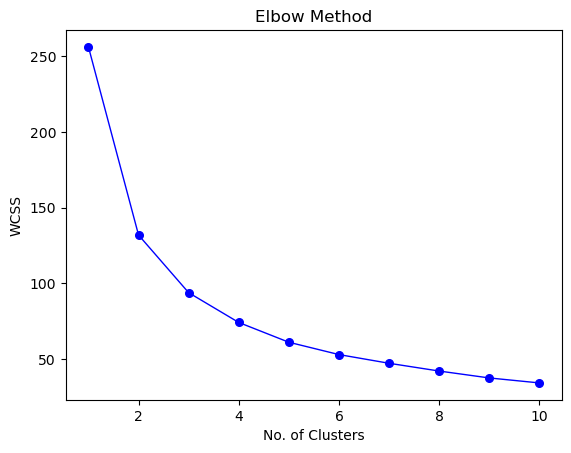

In [34]:
# We use the Elbow Method to plot the numbr of Clusters 
# Let us plot the curve between the WCSS and the number of clusters (here, 1 to 10)

plt.plot(range(1,11), wcss, linewidth=1, markersize=11, marker='.', color='blue')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

#### The number of optimum clusters = 5

In [48]:
# let us fit the model for the cluster=5
k_means = KMeans(n_clusters=5, init='k-means++', random_state=28)
y = k_means.fit_predict(df_norm)

# Evaluation
from sklearn.metrics import silhouette_score
score = silhouette_score(y.reshape(-1, 1), k_means.labels_, metric='euclidean')
# Print the score

print('Silhouette Score: %.3f' % score)

Silhouette Score: 1.000


##### The Silhouette Score is good for our model. It performs well.

### Visualization of the Clusters

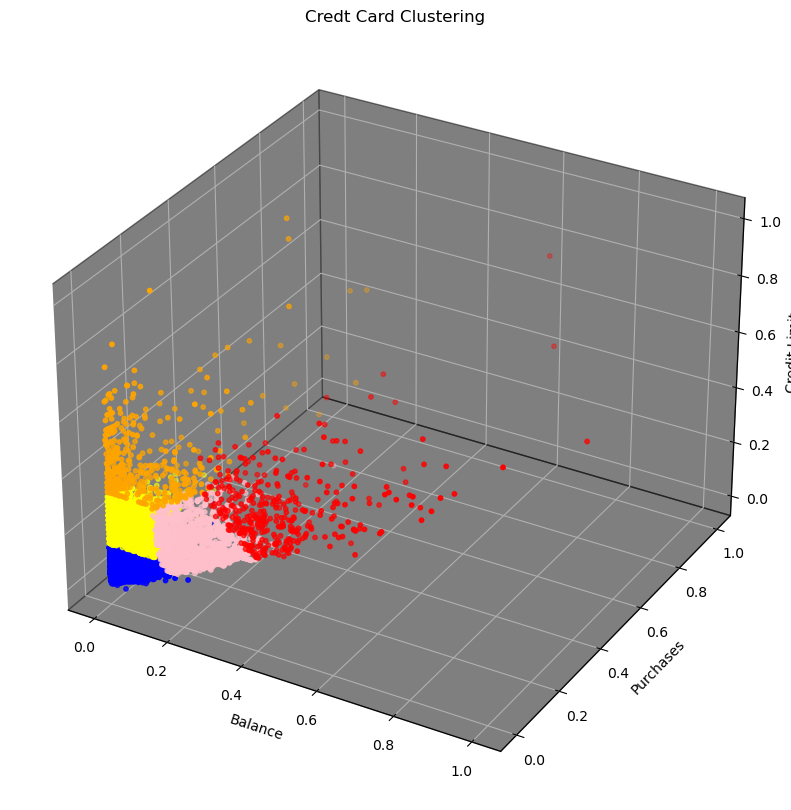

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Setting the Pane Color
ax.xaxis.pane.set_color('black')
ax.yaxis.pane.set_color('black')
ax.zaxis.pane.set_color('black')

# Setting the Edge Color
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

# Plotting the Clusters
ax.scatter(df_norm.loc[y == 0, 'Balance'], df_norm.loc[y == 0, 'Purchases'], df_norm.loc[y == 0, 'Credit Limit'], s=10, c='blue')
ax.scatter(df_norm.loc[y == 1, 'Balance'], df_norm.loc[y == 1, 'Purchases'], df_norm.loc[y == 1, 'Credit Limit'], s=10, c='red')
ax.scatter(df_norm.loc[y == 2, 'Balance'], df_norm.loc[y == 2, 'Purchases'], df_norm.loc[y == 2, 'Credit Limit'], s=10, c='orange')
ax.scatter(df_norm.loc[y == 3, 'Balance'], df_norm.loc[y == 3, 'Purchases'], df_norm.loc[y == 3, 'Credit Limit'], s=10, c='yellow')
ax.scatter(df_norm.loc[y == 4, 'Balance'], df_norm.loc[y == 4, 'Purchases'], df_norm.loc[y == 4, 'Credit Limit'], s=10, c='pink')




# Setting the Title and axes' name
ax.set_title('Credt Card Clustering')
ax.set_xlabel('Balance')
ax.set_ylabel('Purchases')
ax.set_zlabel('Credit Limit')
plt.show()